# Model Training
This script is used for training the LightGBM model. All feature engineering was done previously in SAS.

In [1]:
import numpy as np
import lightgbm as lgbm
import pandas as pd
import os
import time

In [2]:
'''
File paths
'''
folder = os.path.join("/projectnb","cs542sp","netflix_wrw2", "CS542-final-project", "data")

In [3]:
from sklearn.model_selection import train_test_split

def process_data(data):
    
    data = data.dropna()
    
    for c in data.columns:
        data.loc[:,c] = pd.to_numeric(data[c], downcast="unsigned")
    
    X = data.drop(['User_ID','Movie_ID', 'Rated'], axis=1)
    Y = data.loc[:,"Rated"]

    X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 0)
    
    return X_train, X_valid, y_train, y_valid


In [4]:
%%time

# load and train the models in chunks
# for testing:
#  - 5 models
#  - 50M instances

models = []

reader = pd.read_sas('netflix_analysis_dataset2.sas7bdat', chunksize=5_000_000)


'''
Set the parameters
'''
params = {
    "objective":'binary',
    "num_leaves": 1023,
    "max_depth": 10,
    "learning_rate": 0.1,
    "bagging_fraction": 0.7,
    "bagging_freq": 5,
    "metric":"binary_logloss",
    "num_threads": 8,
    "boosting": "gbdt",
    "min_data_in_leaf":200,
    "verbose":-1
}

for i in range(5):
    
    
    print("Start {}".format(i))
    
    start = time.time()
    
    data = next(reader)
    X_train, X_valid, y_train, y_valid = process_data(data)
    train_data = lgbm.Dataset(X_train, label=y_train, free_raw_data = False)
    valid_set = lgbm.Dataset(X_valid, label=y_valid, reference=train_data, free_raw_data = False)
    

    model = lgbm.train(
        params,
        train_data,
        num_boost_round=10000,
        valid_sets=[valid_set],
        early_stopping_rounds = 10,
        verbose_eval = 50,
    )
    
    print("Done {}".format(i), "Time: {}s".format(time.time()-start))
    
    models.append(model)



Start 0


/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Training until validation scores don't improve for 10 rounds
[50]	valid_0's binary_logloss: 0.620803
[100]	valid_0's binary_logloss: 0.614806
[150]	valid_0's binary_logloss: 0.610411
[200]	valid_0's binary_logloss: 0.606586
[250]	valid_0's binary_logloss: 0.603505
[300]	valid_0's binary_logloss: 0.601057
[350]	valid_0's binary_logloss: 0.598932
[400]	valid_0's binary_logloss: 0.597151
[450]	valid_0's binary_logloss: 0.595401
[500]	valid_0's binary_logloss: 0.593417
[550]	valid_0's binary_logloss: 0.591939
[600]	valid_0's binary_logloss: 0.590203
[650]	valid_0's binary_logloss: 0.589037
[700]	valid_0's binary_logloss: 0.588015
[750]	valid_0's binary_logloss: 0.586945
[800]	valid_0's binary_logloss: 0.586043
[850]	valid_0's binary_logloss: 0.585089
[900]	valid_0's binary_logloss: 0.584268
[950]	valid_0's binary_logloss: 0.583541
[1000]	valid_0's binary_logloss: 0.5828
[1050]	valid_0's binary_logloss: 0.581944
[1100]	valid_0's binary_logloss: 0.581155
[1150]	valid_0's binary_logloss: 0.58

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Training until validation scores don't improve for 10 rounds
[50]	valid_0's binary_logloss: 0.618414
[100]	valid_0's binary_logloss: 0.61237
[150]	valid_0's binary_logloss: 0.608296
[200]	valid_0's binary_logloss: 0.604835
[250]	valid_0's binary_logloss: 0.601949
[300]	valid_0's binary_logloss: 0.599248
[350]	valid_0's binary_logloss: 0.597259
[400]	valid_0's binary_logloss: 0.595158
[450]	valid_0's binary_logloss: 0.593378
[500]	valid_0's binary_logloss: 0.591964
[550]	valid_0's binary_logloss: 0.590203
[600]	valid_0's binary_logloss: 0.589223
[650]	valid_0's binary_logloss: 0.588261
[700]	valid_0's binary_logloss: 0.587098
[750]	valid_0's binary_logloss: 0.585882
[800]	valid_0's binary_logloss: 0.584927
[850]	valid_0's binary_logloss: 0.583907
[900]	valid_0's binary_logloss: 0.583092
[950]	valid_0's binary_logloss: 0.58224
[1000]	valid_0's binary_logloss: 0.581394
[1050]	valid_0's binary_logloss: 0.580641
[1100]	valid_0's binary_logloss: 0.580103
[1150]	valid_0's binary_logloss: 0.57

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Training until validation scores don't improve for 10 rounds
[50]	valid_0's binary_logloss: 0.619946
[100]	valid_0's binary_logloss: 0.614629
[150]	valid_0's binary_logloss: 0.610144
[200]	valid_0's binary_logloss: 0.606527
[250]	valid_0's binary_logloss: 0.603349
[300]	valid_0's binary_logloss: 0.600903
[350]	valid_0's binary_logloss: 0.59861
[400]	valid_0's binary_logloss: 0.597053
[450]	valid_0's binary_logloss: 0.595401
[500]	valid_0's binary_logloss: 0.593711
[550]	valid_0's binary_logloss: 0.592101
[600]	valid_0's binary_logloss: 0.590811
[650]	valid_0's binary_logloss: 0.589659
[700]	valid_0's binary_logloss: 0.588376
[750]	valid_0's binary_logloss: 0.587287
[800]	valid_0's binary_logloss: 0.586248
[850]	valid_0's binary_logloss: 0.585412
[900]	valid_0's binary_logloss: 0.584582
[950]	valid_0's binary_logloss: 0.583612
[1000]	valid_0's binary_logloss: 0.582918
[1050]	valid_0's binary_logloss: 0.582281
[1100]	valid_0's binary_logloss: 0.581462
[1150]	valid_0's binary_logloss: 0.5

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Training until validation scores don't improve for 10 rounds
[50]	valid_0's binary_logloss: 0.620497
[100]	valid_0's binary_logloss: 0.614089
[150]	valid_0's binary_logloss: 0.609266
[200]	valid_0's binary_logloss: 0.605444
[250]	valid_0's binary_logloss: 0.602554
[300]	valid_0's binary_logloss: 0.599903
[350]	valid_0's binary_logloss: 0.597444
[400]	valid_0's binary_logloss: 0.595474
[450]	valid_0's binary_logloss: 0.593439
[500]	valid_0's binary_logloss: 0.591907
[550]	valid_0's binary_logloss: 0.590375
[600]	valid_0's binary_logloss: 0.589054
[650]	valid_0's binary_logloss: 0.588173
[700]	valid_0's binary_logloss: 0.586893
[750]	valid_0's binary_logloss: 0.586025
[800]	valid_0's binary_logloss: 0.584968
[850]	valid_0's binary_logloss: 0.584006
[900]	valid_0's binary_logloss: 0.583159
[950]	valid_0's binary_logloss: 0.582437
[1000]	valid_0's binary_logloss: 0.581747
[1050]	valid_0's binary_logloss: 0.581052
[1100]	valid_0's binary_logloss: 0.580401
[1150]	valid_0's binary_logloss: 0.

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Training until validation scores don't improve for 10 rounds
[50]	valid_0's binary_logloss: 0.619216
[100]	valid_0's binary_logloss: 0.612851
[150]	valid_0's binary_logloss: 0.608842
[200]	valid_0's binary_logloss: 0.605396
[250]	valid_0's binary_logloss: 0.602676
[300]	valid_0's binary_logloss: 0.599752
[350]	valid_0's binary_logloss: 0.597845
[400]	valid_0's binary_logloss: 0.595812
[450]	valid_0's binary_logloss: 0.594177
[500]	valid_0's binary_logloss: 0.592306
[550]	valid_0's binary_logloss: 0.590886
[600]	valid_0's binary_logloss: 0.589625
[650]	valid_0's binary_logloss: 0.588687
[700]	valid_0's binary_logloss: 0.587731
[750]	valid_0's binary_logloss: 0.586705
[800]	valid_0's binary_logloss: 0.585699
[850]	valid_0's binary_logloss: 0.584815
[900]	valid_0's binary_logloss: 0.583947
[950]	valid_0's binary_logloss: 0.583068
[1000]	valid_0's binary_logloss: 0.582343
[1050]	valid_0's binary_logloss: 0.581795
[1100]	valid_0's binary_logloss: 0.581163
[1150]	valid_0's binary_logloss: 0.

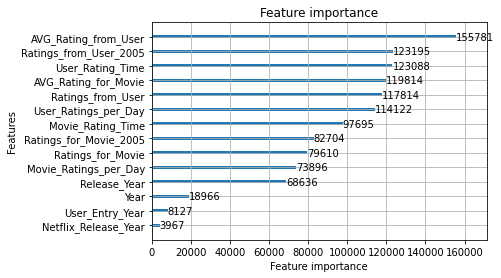

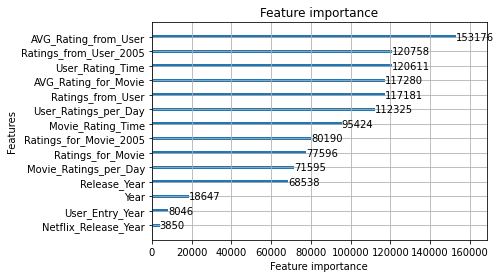

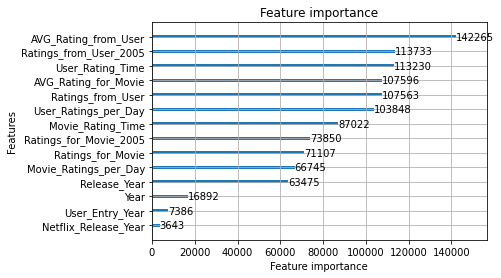

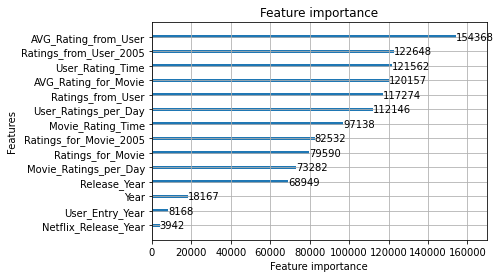

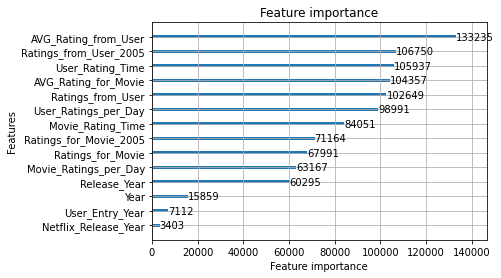

In [5]:
for m in models:
    lgbm.plot_importance(m)

In [6]:
from sklearn.metrics import accuracy_score


def evaluate(model, X_train, X_valid, y_train, y_valid, num = 1_000_000):
    
    train_index = y_train.sample(num).index
    test_index = y_valid.sample(num).index
    
    train_prediction = model.predict(X_train.loc[train_index])
    valid_prediction = model.predict(X_valid.loc[test_index])
    
    train = accuracy_score(y_train.loc[train_index], train_prediction > 0.5)
    test = accuracy_score(y_valid.loc[test_index], valid_prediction > 0.5)
    
    '''
    Check for overfitting
    '''
    print('\tTrain score:\t{:.3f}'.format(train))
    print('\tTest score:\t{:.3f}'.format(test))
    
    return train, test

In [7]:
evaluate(models[4], X_train, X_valid, y_train, y_valid, num=10_000)

	Train score:	0.767
	Test score:	0.709


(0.7666, 0.7086)

In [8]:
'''
Metrics output
'''
from sklearn.metrics import classification_report

test_index = y_valid.sample(100000).index

valid_prediction = model.predict(X_valid.loc[test_index])

print(classification_report(y_valid[test_index], valid_prediction > 0.5))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76     59007
           1       0.67      0.55      0.60     40993

    accuracy                           0.70    100000
   macro avg       0.69      0.68      0.68    100000
weighted avg       0.70      0.70      0.70    100000



In [10]:
for i, m in enumerate(models):
    m.save_model('models/mini_model_' + str(i) + '.txt')